<a href="https://colab.research.google.com/github/SurajKuwar/DInesh-test/blob/main/SIT719_5_1_Task_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION 1: DECLARE THE MODULES

In [ ]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')




# SECTION 2: Data import and preprocess
#Run this but dont worry if it does not make any sense Jump to SECTION 3 that is related to your HD task.

In [ ]:
!pip install wget
import wget
    
link_to_data = 'https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/training_attack_types.txt?raw=true'
DataSet = wget.download(link_to_data) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=7562c6f463a1c993e6de3c587fc4c9d1ad2c600268ae5abbcdc2a7d17008f24d
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


# New Section

In [ ]:
DataSet

'training_attack_types.txt'

In [ ]:
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']


# Differentiating between nominal, binary, and numeric features

# root_shell is marked as a continuous feature in the kddcup.names 
# file, but it is supposed to be a binary feature according to the 
# dataset documentation

# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [ ]:
# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

category = defaultdict(list)
category['benign'].append('normal')

with open(DataSet, 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])

In [ ]:
attack_mapping

{'normal': 'benign',
 'apache2': 'dos',
 'back': 'dos',
 'mailbomb': 'dos',
 'processtable': 'dos',
 'snmpgetattack': 'dos',
 'teardrop': 'dos',
 'smurf': 'dos',
 'land': 'dos',
 'neptune': 'dos',
 'pod': 'dos',
 'udpstorm': 'dos',
 'ps': 'u2r',
 'buffer_overflow': 'u2r',
 'perl': 'u2r',
 'rootkit': 'u2r',
 'loadmodule': 'u2r',
 'xterm': 'u2r',
 'sqlattack': 'u2r',
 'httptunnel': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'snmpguess': 'r2l',
 'imap': 'r2l',
 'spy': 'r2l',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'multihop': 'r2l',
 'phf': 'r2l',
 'named': 'r2l',
 'sendmail': 'r2l',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'worm': 'probe',
 'nmap': 'probe',
 'ipsweep': 'probe',
 'portsweep': 'probe',
 'satan': 'probe',
 'mscan': 'probe',
 'saint': 'probe'}

In [ ]:
#Processing Training Data

train_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTrain%2B.txt'



train_df = pd.read_csv(train_file, names=header_names)

train_df['attack_category'] = train_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])

train_df.drop(['success_pred'], axis=1, inplace=True)






In [ ]:
#Processing test Data
test_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTest%2B.txt'

test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)

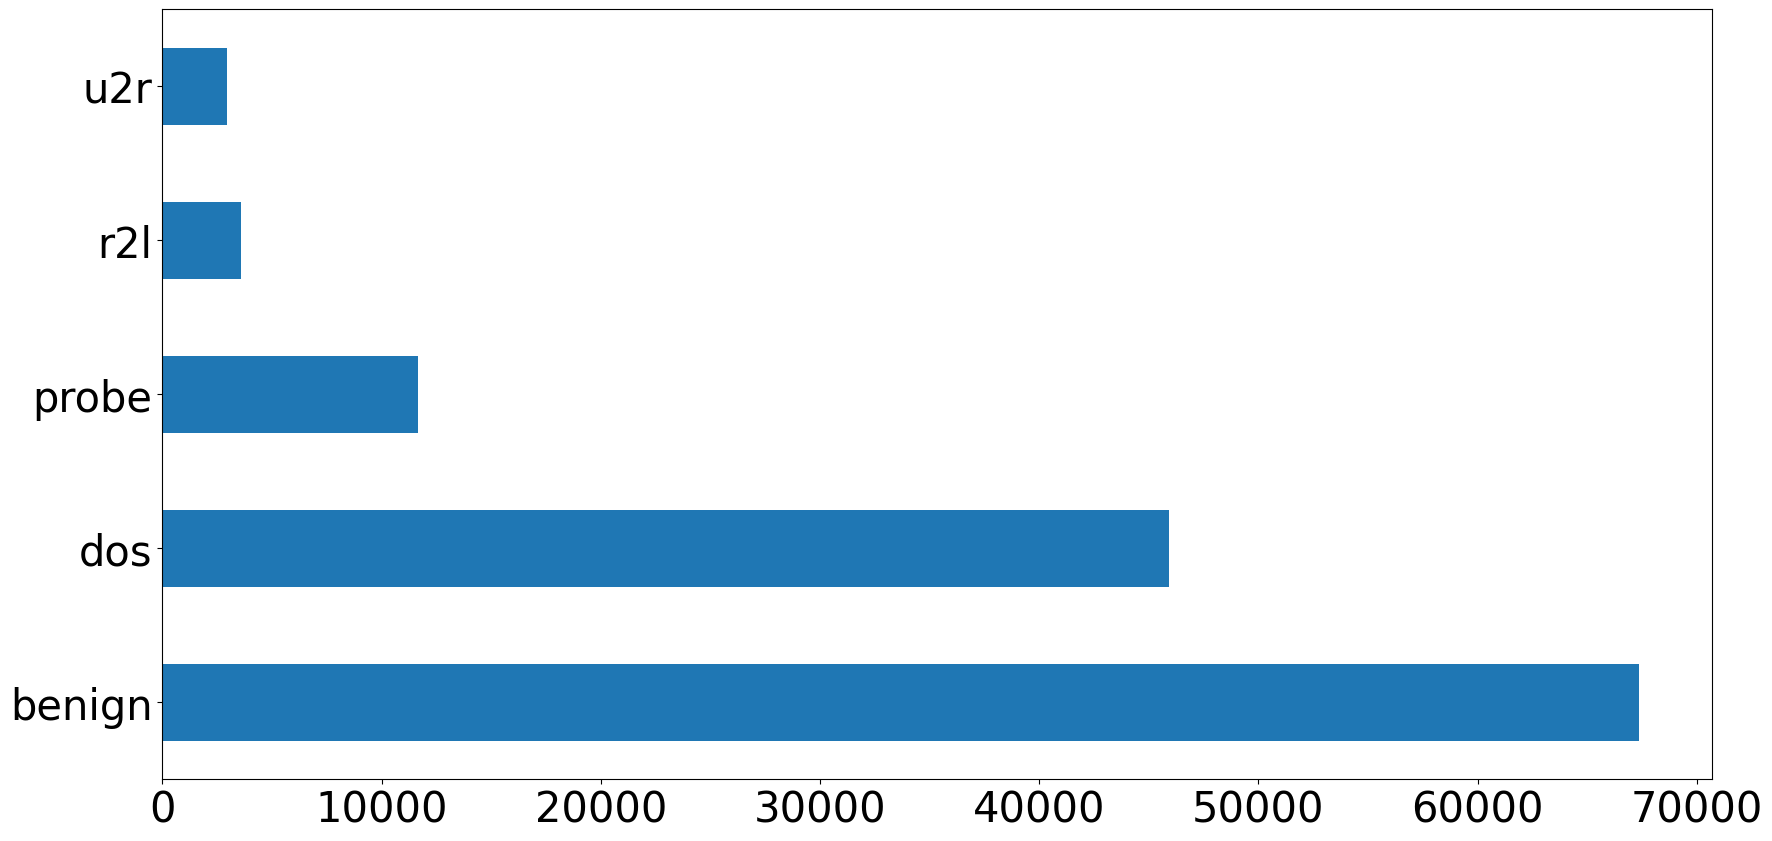

In [ ]:
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

train_attack_cats.plot(kind='barh', figsize=(20,10), fontsize=30)

train_df[binary_cols].describe().transpose()
train_df.groupby(['su_attempted']).size()
train_df['su_attempted'].replace(2, 0, inplace=True)
test_df['su_attempted'].replace(2, 0, inplace=True)
train_df.groupby(['su_attempted']).size()
train_df.groupby(['num_outbound_cmds']).size()

#Now, that's not a very useful feature - let's drop it from the dataset

train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)
numeric_cols.remove('num_outbound_cmds')



#Data Preparation

train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)


combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

# Store dummy variable feature names
dummy_variables = list(set(train_x)-set(combined_df_raw))

#execute the commands in console
train_x.describe()
train_x['duration'].describe()
# Experimenting with StandardScaler on the single 'duration' feature
from sklearn.preprocessing import StandardScaler

durations = train_x['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

# Experimenting with RobustScaler on the single 'duration' feature
from sklearn.preprocessing import RobustScaler

min_max_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Experimenting with MaxAbsScaler on the single 'duration' feature
from sklearn.preprocessing import MaxAbsScaler

max_Abs_scaler = MaxAbsScaler().fit(durations)
robust_scaled_durations = max_Abs_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Let's proceed with StandardScaler- Apply to all the numeric columns

standard_scaler = StandardScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    standard_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    standard_scaler.transform(test_x[numeric_cols])
    
train_x.describe()



train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)


# SECTION 3: Multi class classification
#This is the section where you have to add other algorithms, tune algorithms and visualize to compare and analyze algorithms

In [ ]:
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)


[[9365   56  289    1    0]
 [1541 5998   97    0    0]
 [ 677  220 1526    0    0]
 [2278    1   14  277    4]
 [ 175    0    5    5   15]]
0.2378903477643719


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_Y,pred_y))
print(classification_report(test_Y, pred_y))

[[9365   56  289    1    0]
 [1541 5998   97    0    0]
 [ 677  220 1526    0    0]
 [2278    1   14  277    4]
 [ 175    0    5    5   15]]
              precision    recall  f1-score   support

      benign       0.67      0.96      0.79      9711
         dos       0.96      0.79      0.86      7636
       probe       0.79      0.63      0.70      2423
         r2l       0.98      0.11      0.19      2574
         u2r       0.79      0.07      0.14       200

    accuracy                           0.76     22544
   macro avg       0.84      0.51      0.54     22544
weighted avg       0.81      0.76      0.73     22544



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import timeit

#calculate start time
start=timeit.default_timer()

#create a Gaussion Classifier
clf=DecisionTreeClassifier()

#train the model using the training sets y_pred=clf.predict(X_text)
clf.fit(train_x,train_Y)

#calculate stop time
stop=timeit.default_timer()
train_time= stop - start

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import timeit

#calculate start time
#calculate start time
start= timeit.default_timer()

#predict the model
pred_y=clf.predict(test_x)

#calculate stop time
stop= timeit.default_timer()
test_time=stop - start 
print(confusion_matrix(test_Y, pred_y))
print(classification_report(test_Y,pred_y))

[[9351   59  298    2    1]
 [1418 6126   92    0    0]
 [ 727  197 1499    0    0]
 [2323    3    6  231   11]
 [ 179    0    3    5   13]]
              precision    recall  f1-score   support

      benign       0.67      0.96      0.79      9711
         dos       0.96      0.80      0.87      7636
       probe       0.79      0.62      0.69      2423
         r2l       0.97      0.09      0.16      2574
         u2r       0.52      0.07      0.12       200

    accuracy                           0.76     22544
   macro avg       0.78      0.51      0.53     22544
weighted avg       0.81      0.76      0.73     22544



In [ ]:
#Train time
print('Train Time(s):', train_time)

Train Time(s): 2.34660760700001


In [ ]:
#Test Time
print("Test Time(s):", test_time)

Test Time(s): 0.014928675000021485


Grid Search Parameter Tuning Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#create a Gaussian Classifier
classifier = DecisionTreeClassifier(random_state=17)

#define the hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

#Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(train_x, train_Y)

#print the best hyperparameters
print(grid_search.best_params_)


{'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 4}


Algorithm 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:

!pip install scikit-learn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 5-class classification version
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

classifier = RandomForestClassifier(random_state=17)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)

[[9457   67  186    0    1]
 [1582 5929  125    0    0]
 [ 807  164 1452    0    0]
 [2478    0    2   93    1]
 [ 196    0    0    3    1]]
0.2489354151880766


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_Y,pred_y))
print(classification_report(test_Y, pred_y))

[[9457   67  186    0    1]
 [1582 5929  125    0    0]
 [ 807  164 1452    0    0]
 [2478    0    2   93    1]
 [ 196    0    0    3    1]]
              precision    recall  f1-score   support

      benign       0.65      0.97      0.78      9711
         dos       0.96      0.78      0.86      7636
       probe       0.82      0.60      0.69      2423
         r2l       0.97      0.04      0.07      2574
         u2r       0.33      0.01      0.01       200

    accuracy                           0.75     22544
   macro avg       0.75      0.48      0.48     22544
weighted avg       0.81      0.75      0.71     22544



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import timeit

#calculate start time
start=timeit.default_timer()

#create a Gaussion Classifier
clf=DecisionTreeClassifier()

#train the model using the training sets y_pred=clf.predict(X_text)
clf.fit(train_x,train_Y)

#calculate stop time
stop=timeit.default_timer()
train_time= stop - start

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import timeit

#calculate start time
#calculate start time
start= timeit.default_timer()

#predict the model
pred_y=clf.predict(test_x)

#calculate stop time
stop= timeit.default_timer()
test_time=stop - start 
print(confusion_matrix(test_Y, pred_y))
print(classification_report(test_Y,pred_y))

[[9360   59  289    2    1]
 [1593 5949   94    0    0]
 [ 680  205 1538    0    0]
 [2022    4   15  188  345]
 [ 176    0    2    8   14]]
              precision    recall  f1-score   support

      benign       0.68      0.96      0.80      9711
         dos       0.96      0.78      0.86      7636
       probe       0.79      0.63      0.71      2423
         r2l       0.95      0.07      0.14      2574
         u2r       0.04      0.07      0.05       200

    accuracy                           0.76     22544
   macro avg       0.68      0.50      0.51     22544
weighted avg       0.81      0.76      0.73     22544



In [ ]:
#Train time
print('Train Time(s):', train_time)

Train Time(s): 3.346322584000063


In [ ]:
#Test Time
print("Test Time(s):", test_time)

Test Time(s): 0.05227808300014658


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the random forest classifier
classifier = RandomForestClassifier(random_state=17)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object with the classifier and hyperparameters
grid_search = GridSearchCV(
    classifier, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(train_x, train_Y)

# Print the best hyperparameters and the corresponding accuracy score
print('Best hyperparameters: ', grid_search.best_params_)
print('Best accuracy score: ', grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy score:  0.99858700106936


Algorithm 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
!pip install wget
import wget
    
link_to_data = 'https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/training_attack_types.txt?raw=true'
DataSet = wget.download(link_to_data) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=c92bcf7ba3abdb0c25e4b3742a22336fedc23d6558192146ac4bd3bd407a7b62
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
DataSet


'training_attack_types.txt'

In [ ]:
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']


# Differentiating between nominal, binary, and numeric features

# root_shell is marked as a continuous feature in the kddcup.names 
# file, but it is supposed to be a binary feature according to the 
# dataset documentation

# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [ ]:
# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

category = defaultdict(list)
category['benign'].append('normal')

with open(DataSet, 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])

In [ ]:
#Processing Training Data

train_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTrain%2B.txt'



train_df = pd.read_csv(train_file, names=header_names)

train_df['attack_category'] = train_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])

train_df.drop(['success_pred'], axis=1, inplace=True)

In [ ]:
#Processing test Data
test_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTest%2B.txt'

test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)

In [ ]:
!pip install scikit-learn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
attack_mapping

{'normal': 'benign',
 'apache2': 'dos',
 'back': 'dos',
 'mailbomb': 'dos',
 'processtable': 'dos',
 'snmpgetattack': 'dos',
 'teardrop': 'dos',
 'smurf': 'dos',
 'land': 'dos',
 'neptune': 'dos',
 'pod': 'dos',
 'udpstorm': 'dos',
 'ps': 'u2r',
 'buffer_overflow': 'u2r',
 'perl': 'u2r',
 'rootkit': 'u2r',
 'loadmodule': 'u2r',
 'xterm': 'u2r',
 'sqlattack': 'u2r',
 'httptunnel': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'snmpguess': 'r2l',
 'imap': 'r2l',
 'spy': 'r2l',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'multihop': 'r2l',
 'phf': 'r2l',
 'named': 'r2l',
 'sendmail': 'r2l',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'worm': 'probe',
 'nmap': 'probe',
 'ipsweep': 'probe',
 'portsweep': 'probe',
 'satan': 'probe',
 'mscan': 'probe',
 'saint': 'probe'}

In [ ]:
# 5-class classification version
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, zero_one_loss

classifier = GaussianNB()
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)

[[6756   62   10 2599  284]
 [3400 3162    4 1041   29]
 [1382  345  237  323  136]
 [1113    3    6  933  519]
 [ 115    0    0   22   63]]
0.5053672817601136


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_Y,pred_y))
print(classification_report(test_Y, pred_y))

[[6756   62   10 2599  284]
 [3400 3162    4 1041   29]
 [1382  345  237  323  136]
 [1113    3    6  933  519]
 [ 115    0    0   22   63]]
              precision    recall  f1-score   support

      benign       0.53      0.70      0.60      9711
         dos       0.89      0.41      0.56      7636
       probe       0.92      0.10      0.18      2423
         r2l       0.19      0.36      0.25      2574
         u2r       0.06      0.32      0.10       200

    accuracy                           0.49     22544
   macro avg       0.52      0.38      0.34     22544
weighted avg       0.65      0.49      0.50     22544



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import timeit

#calculate start time
start=timeit.default_timer()

#create a Gaussion Classifier
clf=DecisionTreeClassifier()

#train the model using the training sets y_pred=clf.predict(X_text)
clf.fit(train_x,train_Y)

#calculate stop time
stop=timeit.default_timer()
train_time= stop - start

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import timeit

#calculate start time
#calculate start time
start= timeit.default_timer()

#predict the model
pred_y=clf.predict(test_x)

#calculate stop time
stop= timeit.default_timer()
test_time=stop - start 
print(confusion_matrix(test_Y, pred_y))
print(classification_report(test_Y,pred_y))

[[9430   59  220    1    1]
 [1546 5994   96    0    0]
 [ 681  217 1525    0    0]
 [2019    4   14  188  349]
 [ 172    0    3    7   18]]
              precision    recall  f1-score   support

      benign       0.68      0.97      0.80      9711
         dos       0.96      0.78      0.86      7636
       probe       0.82      0.63      0.71      2423
         r2l       0.96      0.07      0.14      2574
         u2r       0.05      0.09      0.06       200

    accuracy                           0.76     22544
   macro avg       0.69      0.51      0.51     22544
weighted avg       0.82      0.76      0.73     22544



In [ ]:
#Train time
print('Train Time(s):', train_time)

Train Time(s): 1.9182792799999788


In [ ]:
#Test Time
print("Test Time(s):", test_time)

Test Time(s): 0.011404279000089446


Algorithm 4

In [ ]:
# 5-class classification version
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

classifier = KNeighborsClassifier()
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)

[[9444   54  207    5    1]
 [1630 5925   81    0    0]
 [ 614  180 1629    0    0]
 [2362    2   40  170    0]
 [ 170    0   17    4    9]]
0.23806777856635908


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_Y,pred_y))
print(classification_report(test_Y, pred_y))

[[9444   54  207    5    1]
 [1630 5925   81    0    0]
 [ 614  180 1629    0    0]
 [2362    2   40  170    0]
 [ 170    0   17    4    9]]
              precision    recall  f1-score   support

      benign       0.66      0.97      0.79      9711
         dos       0.96      0.78      0.86      7636
       probe       0.83      0.67      0.74      2423
         r2l       0.95      0.07      0.12      2574
         u2r       0.90      0.04      0.09       200

    accuracy                           0.76     22544
   macro avg       0.86      0.51      0.52     22544
weighted avg       0.82      0.76      0.73     22544



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import timeit

#calculate start time
start=timeit.default_timer()

#create a Gaussion Classifier
clf=DecisionTreeClassifier()

#train the model using the training sets y_pred=clf.predict(X_text)
clf.fit(train_x,train_Y)

#calculate stop time
stop=timeit.default_timer()
train_time= stop - start

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import timeit

#calculate start time
#calculate start time
start= timeit.default_timer()

#predict the model
pred_y=clf.predict(test_x)

#calculate stop time
stop= timeit.default_timer()
test_time=stop - start 
print(confusion_matrix(test_Y, pred_y))
print(classification_report(test_Y,pred_y))

[[9352   59  299    1    0]
 [1543 5999   94    0    0]
 [ 701  188 1534    0    0]
 [2335    4    7  224    4]
 [ 177    0    4    4   15]]
              precision    recall  f1-score   support

      benign       0.66      0.96      0.79      9711
         dos       0.96      0.79      0.86      7636
       probe       0.79      0.63      0.70      2423
         r2l       0.98      0.09      0.16      2574
         u2r       0.79      0.07      0.14       200

    accuracy                           0.76     22544
   macro avg       0.84      0.51      0.53     22544
weighted avg       0.81      0.76      0.73     22544



In [ ]:
#Train time
print('Train Time(s):', train_time)

Train Time(s): 1.692796351999732


In [ ]:
#Test Time
print("Test Time(s):", test_time)

Test Time(s): 0.014222598000060316


Algorithm 5

In [ ]:
# 5-class classification version
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, zero_one_loss

classifier = SVC()
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)

[[9462   62  187    0    0]
 [1882 5693   61    0    0]
 [ 836  175 1412    0    0]
 [2318    0    4  252    0]
 [ 177    0   15    3    5]]
0.2537260468417317


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_Y,pred_y))
print(classification_report(test_Y, pred_y))

[[9462   62  187    0    0]
 [1882 5693   61    0    0]
 [ 836  175 1412    0    0]
 [2318    0    4  252    0]
 [ 177    0   15    3    5]]
              precision    recall  f1-score   support

      benign       0.64      0.97      0.78      9711
         dos       0.96      0.75      0.84      7636
       probe       0.84      0.58      0.69      2423
         r2l       0.99      0.10      0.18      2574
         u2r       1.00      0.03      0.05       200

    accuracy                           0.75     22544
   macro avg       0.89      0.49      0.51     22544
weighted avg       0.82      0.75      0.71     22544



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import timeit

#calculate start time
start=timeit.default_timer()

#create a Gaussion Classifier
clf=DecisionTreeClassifier()

#train the model using the training sets y_pred=clf.predict(X_text)
clf.fit(train_x,train_Y)

#calculate stop time
stop=timeit.default_timer()
train_time= stop - start

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import timeit

#calculate start time
#calculate start time
start= timeit.default_timer()

#predict the model
pred_y=clf.predict(test_x)

#calculate stop time
stop= timeit.default_timer()
test_time=stop - start 
print(confusion_matrix(test_Y, pred_y))
print(classification_report(test_Y,pred_y))

[[9353   57  298    2    1]
 [1416 6125   95    0    0]
 [ 696  241 1486    0    0]
 [2326    1   14  227    6]
 [ 174    0    3    4   19]]
              precision    recall  f1-score   support

      benign       0.67      0.96      0.79      9711
         dos       0.95      0.80      0.87      7636
       probe       0.78      0.61      0.69      2423
         r2l       0.97      0.09      0.16      2574
         u2r       0.73      0.10      0.17       200

    accuracy                           0.76     22544
   macro avg       0.82      0.51      0.54     22544
weighted avg       0.81      0.76      0.73     22544



In [ ]:
#Train time
print('Train Time(s):', train_time)

Train Time(s): 1.692796351999732


In [ ]:
#Test Time
print("Test Time(s):", test_time)

Test Time(s): 0.012169589000222913


Algorithm 6

In [ ]:
# 5-class classification version
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

classifier =GradientBoostingClassifier()
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)


[[9426   72  207    3    3]
 [1610 5993   33    0    0]
 [ 473  106 1617  227    0]
 [2264    0    5  303    2]
 [ 174    0    6   11    9]]
0.23048261178140528


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_Y,pred_y))
print(classification_report(test_Y, pred_y))

[[9426   72  207    3    3]
 [1610 5993   33    0    0]
 [ 473  106 1617  227    0]
 [2264    0    5  303    2]
 [ 174    0    6   11    9]]
              precision    recall  f1-score   support

      benign       0.68      0.97      0.80      9711
         dos       0.97      0.78      0.87      7636
       probe       0.87      0.67      0.75      2423
         r2l       0.56      0.12      0.19      2574
         u2r       0.64      0.04      0.08       200

    accuracy                           0.77     22544
   macro avg       0.74      0.52      0.54     22544
weighted avg       0.78      0.77      0.74     22544



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import timeit

#calculate start time
start=timeit.default_timer()

#create a Gaussion Classifier
clf=DecisionTreeClassifier()

#train the model using the training sets y_pred=clf.predict(X_text)
clf.fit(train_x,train_Y)

#calculate stop time
stop=timeit.default_timer()
train_time= stop - start

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import timeit

#calculate start time
#calculate start time
start= timeit.default_timer()

#predict the model
pred_y=clf.predict(test_x)

#calculate stop time
stop= timeit.default_timer()
test_time=stop - start 
print(confusion_matrix(test_Y, pred_y))
print(classification_report(test_Y,pred_y))

[[9360   59  289    3    0]
 [1419 6126   91    0    0]
 [ 715  227 1481    0    0]
 [2324    2   10  231    7]
 [ 176    0    2    5   17]]
              precision    recall  f1-score   support

      benign       0.67      0.96      0.79      9711
         dos       0.96      0.80      0.87      7636
       probe       0.79      0.61      0.69      2423
         r2l       0.97      0.09      0.16      2574
         u2r       0.71      0.09      0.15       200

    accuracy                           0.76     22544
   macro avg       0.82      0.51      0.53     22544
weighted avg       0.81      0.76      0.73     22544



In [ ]:
#Train time
print('Train Time(s):', train_time)

Train Time(s): 1.7049054790004448


In [ ]:
#Test Time
print("Test Time(s):", test_time)

Test Time(s): 0.013431579000098282
